In [3]:
import numpy as np, pandas as pd

In [4]:
hr = pd.read_csv('housing3.csv')
hr.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,gulshan
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,mohakhali
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,bashundhara
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,bashundhara
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,azimpur


In [5]:
hr.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus', 'locality'],
      dtype='object')

In [6]:
hr.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
hr.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
locality            0
dtype: int64

In [8]:
hr.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Text(0, 0.5, 'price')

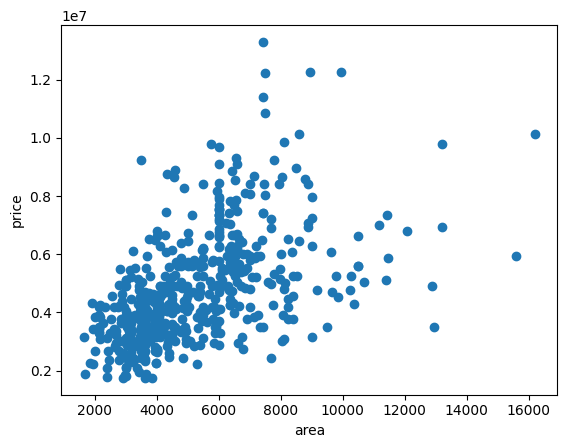

In [10]:
plt.scatter(hr['area'], hr['price'])
plt.xlabel('area')
plt.ylabel('price')

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lrModel = LinearRegression()
lrModel.fit(hr[['area']], hr['price'])

LinearRegression()

In [13]:
lrModel.coef_

array([461.97489427])

In [14]:
lrModel.intercept_

np.float64(2387308.4823964303)

#### y = 2387308.4823964303 + 461.97489427 * X

In [15]:
lrModel.predict([[1000]])

d:\Intro_to_AI-BKIAC-main\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2849283.37666921])

In [16]:
to_pred = [[1000], [2000], [2500], [3200]]
lrModel.predict(to_pred)

d:\Intro_to_AI-BKIAC-main\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2849283.37666921, 3311258.270942  , 3542245.71807839,
       3865628.14406934])

In [17]:
X = hr.drop(['price'], axis=1)

In [18]:
y = hr['price']

In [19]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
train_X.shape

(436, 12)

In [21]:
test_X.shape

(109, 12)

In [22]:
train_y.shape

(436,)

In [23]:
test_y.shape

(109,)

In [24]:
lrModel = LinearRegression()
lrModel.fit(train_X, train_y)

ValueError: could not convert string to float: 'yes'

In [25]:
X = hr[['area', 'bedrooms', 'bathrooms', 'stories']]
y = hr['price']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

lrModel = LinearRegression()
lrModel.fit(train_X, train_y)

LinearRegression()

In [26]:
pred_y = lrModel.predict(test_X)

In [27]:
plt.figure(figsize=10)
plt.plot(test_X['area'], pred_y, color='r')
plt.scatter(test_X['area'], test_y)

TypeError: Value after * must be an iterable, not int

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score

In [32]:
def eval(model, train_X, train_y, test_X, test_y):
    print("The training score is,", model.score(train_X, train_y), end='\n')
    print("The testing score is,", model.score(test_X, test_y))

In [33]:
def metric_score(y_test, ypred):
    print("The mean absolute error is: ", mean_absolute_error(test_y, pred_y))
    print("The mean squared error is: ", mean_squared_error(test_y, pred_y))
    print("The R2 score is: ", r2_score(test_y, pred_y)) 

In [35]:
eval(lrModel, test_X[['area']], test_y, test_X[['area']], test_y)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- bathrooms
- bedrooms
- stories


In [ ]:
metric_score(test_y, pred_y)

In [36]:
pip install multiset

Note: you may need to restart the kernel to use updated packages.


In [37]:
from multiset import Multiset

In [38]:
Multiset(hr['furnishingstatus'])

Multiset({'furnished': 140, 'semi-furnished': 227, 'unfurnished': 178})

In [43]:
lb = LabelEncoder()
lb.fit_transform(hr['furnishingstatus'])[:10]

NameError: name 'LabelEncoder' is not defined